In [182]:
!unzip Auction_master_kr.zip

Archive:  Auction_master_kr.zip
replace Auction_rent.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Auction_rent.csv        
  inflating: __MACOSX/._Auction_rent.csv  
  inflating: Auction_submission.csv  
  inflating: __MACOSX/._Auction_submission.csv  
  inflating: Auction_master_test.csv  
  inflating: __MACOSX/._Auction_master_test.csv  
  inflating: Auction_master_train.csv  
  inflating: __MACOSX/._Auction_master_train.csv  
  inflating: Auction_regist.csv      
  inflating: __MACOSX/._Auction_regist.csv  
  inflating: Auction_result.csv      
  inflating: __MACOSX/._Auction_result.csv  


지역 + 동 합쳐서 생각


In [256]:
import numpy as np
import pandas as pd
from IPython.display import display

rent = pd.read_csv('Auction_rent.csv')
train = pd.read_csv('Auction_master_train.csv')
test = pd.read_csv('Auction_master_test.csv')
regist = pd.read_csv('Auction_regist.csv')

display(train)
display(test)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19 00:00:00,2017-06-19 00:00:00,낙찰,Private,서울,도봉구,창동,NaN,N,45.0,NaN,삼성 110동 15층 1501호,아파트,1992-08-29 00:00:00,21,15,NaN,N,노해로66길,21.0,NaN,2017-08-30 00:00:00,배당,37.648810,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13 00:00:00,2017-03-13 00:00:00,낙찰,중소기업은행,서울,노원구,상계동,NaN,N,1289.0,NaN,상계불암대림 205동 23층 2303호,아파트,2000-05-30 00:00:00,23,23,NaN,N,덕릉로94길,21.0,NaN,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21 00:00:00,2018-01-18 00:00:00,낙찰,우리은행,서울,중구,회현동1가,NaN,N,208.0,NaN,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13 00:00:00,32,19,NaN,N,소공로,35.0,NaN,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10 00:00:00,2016-11-14 00:00:00,낙찰,Private,서울,도봉구,쌍문동,NaN,N,725.0,NaN,삼성래미안 110동 11층 1102호,아파트,2002-11-07 00:00:00,15,11,NaN,N,우이천로,328.0,NaN,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000


,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,1778,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,244565981,100174000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 5층 502호",주상복합,1111-11-11 00:00:00,15,5,"**1차감정:235,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
1,1779,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 6층 601호",주상복합,1111-11-11 00:00:00,15,6,"**1차감정:220,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
2,1784,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 8층 802호",주상복합,1111-11-11 00:00:00,15,8,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
3,1786,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 9층 902호",주상복합,1111-11-11 00:00:00,15,9,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
4,1790,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 11층 1102호",주상복합,1111-11-11 00:00:00,15,11,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1762,강제,개별,4249164200,강림감정,2017-06-12 00:00:00,2,1,3460.9,13.87,13.87,84.91,84.91,420000000,336000000,2017-11-27 00:00:00,2017-12-26 00:00:00,낙찰,서희건설,서울,성북구,하월곡동,NaN,N,229.0,NaN,길음서희스타힐스 23층 2304호,주상복합,2011-12-13 00:00:00,23,23,NaN,N,동소문로,284.0,NaN,2018-02-28 00:00:00,배당,37.605407,127.027309,0
825,1767,강제,일반,320000000,삼일감정,2017-06-27 00:00:00,2,1,13578.9,72.81,72.81,150.66,150.66,580000000,464000000,2017-12-18 00:00:00,2018-01-22 00:00:00,낙찰,신용보증기금,서울,도봉구,방학동,NaN,N,689.0,NaN,", 690-41 방학동부센트레빌 103동 3층 304호",아파트,2005-12-15 00:00:00,14,3,NaN,N,방학로,120.0,NaN,2018-03-29 00:00:00,배당,37.663305,127.039551,0
826,1770,강제,일반,160000000,성북감정,2017-08-01 00:00:00,2,1,57491.8,34.03,34.03,49.77,49.77,293000000,234400000,2017-11-06 00:00:00,2017-12-04 00:00:00,낙찰,Private,서울,중랑구,신내동,NaN,N,650.0,NaN,신내 616동 5층 508호,아파트,1996-05-08 00:00:00,12,5,NaN,N,신내로19길,42.0,NaN,2018-02-07 00:00:00,배당,37.614529,127.091109,0
827,1772,임의,일반,230000000,생림감정,2017-09-28 00:00:00,1,0,27710.2,42.54,42.54,84.84,84.84,492000000,492000000,2018-01-29 00:00:00,2018-01-29 00:00:00,낙찰,중소기업은행,서울,성북구,장위동,NaN,N,317.0,NaN,꿈의숲대명루첸 109동 16층 1601호,아파트,2009-02-19 00:00:00,17,16,NaN,N,월계로36길,27.0,NaN,2018-04-24 00:00:00,배당,37.620359,127.047071,0


In [257]:
train['juso'] = train['addr_do'] + ' ' + train['addr_si']
train = train.drop(['addr_do', 'addr_si'], axis=1)


test['juso'] = test['addr_do'] + ' ' + test['addr_si']
test = test.drop(['addr_do', 'addr_si'], axis=1)

print(train.shape)
print(test.shape)
display(train)
display(test)

(1933, 40)
(829, 40)


,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,juso
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,부산 해운대구
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,부산 해운대구
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,부산 사상구
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,부산 남구
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,부산 사하구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19 00:00:00,2017-06-19 00:00:00,낙찰,Private,창동,NaN,N,45.0,NaN,삼성 110동 15층 1501호,아파트,1992-08-29 00:00:00,21,15,NaN,N,노해로66길,21.0,NaN,2017-08-30 00:00:00,배당,37.648810,127.048683,402500000,서울 도봉구
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13 00:00:00,2017-03-13 00:00:00,낙찰,중소기업은행,상계동,NaN,N,1289.0,NaN,상계불암대림 205동 23층 2303호,아파트,2000-05-30 00:00:00,23,23,NaN,N,덕릉로94길,21.0,NaN,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600,서울 노원구
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21 00:00:00,2018-01-18 00:00:00,낙찰,우리은행,회현동1가,NaN,N,208.0,NaN,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13 00:00:00,32,19,NaN,N,소공로,35.0,NaN,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990,서울 중구
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10 00:00:00,2016-11-14 00:00:00,낙찰,Private,쌍문동,NaN,N,725.0,NaN,삼성래미안 110동 11층 1102호,아파트,2002-11-07 00:00:00,15,11,NaN,N,우이천로,328.0,NaN,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000,서울 도봉구


,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,juso
0,1778,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,244565981,100174000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,낙민동,NaN,N,236.0,NaN,",237-2 삼주 5층 502호",주상복합,1111-11-11 00:00:00,15,5,"**1차감정:235,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0,부산 동래구
1,1779,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,낙찰,Private,낙민동,NaN,N,236.0,NaN,",237-2 삼주 6층 601호",주상복합,1111-11-11 00:00:00,15,6,"**1차감정:220,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0,부산 동래구
2,1784,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,낙민동,NaN,N,236.0,NaN,",237-2 삼주 8층 802호",주상복합,1111-11-11 00:00:00,15,8,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0,부산 동래구
3,1786,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,낙민동,NaN,N,236.0,NaN,",237-2 삼주 9층 902호",주상복합,1111-11-11 00:00:00,15,9,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0,부산 동래구
4,1790,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,낙민동,NaN,N,236.0,NaN,",237-2 삼주 11층 1102호",주상복합,1111-11-11 00:00:00,15,11,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0,부산 동래구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1762,강제,개별,4249164200,강림감정,2017-06-12 00:00:00,2,1,3460.9,13.87,13.87,84.91,84.91,420000000,336000000,2017-11-27 00:00:00,2017-12-26 00:00:00,낙찰,서희건설,하월곡동,NaN,N,229.0,NaN,길음서희스타힐스 23층 2304호,주상복합,2011-12-13 00:00:00,23,23,NaN,N,동소문로,284.0,NaN,2018-02-28 00:00:00,배당,37.605407,127.027309,0,서울 성북구
825,1767,강제,일반,320000000,삼일감정,2017-06-27 00:00:00,2,1,13578.9,72.81,72.81,150.66,150.66,580000000,464000000,2017-12-18 00:00:00,2018-01-22 00:00:00,낙찰,신용보증기금,방학동,NaN,N,689.0,NaN,", 690-41 방학동부센트레빌 103동 3층 304호",아파트,2005-12-15 00:00:00,14,3,NaN,N,방학로,120.0,NaN,2018-03-29 00:00:00,배당,37.663305,127.039551,0,서울 도봉구
826,1770,강제,일반,160000000,성북감정,2017-08-01 00:00:00,2,1,57491.8,34.03,34.03,49.77,49.77,293000000,234400000,2017-11-06 00:00:00,2017-12-04 00:00:00,낙찰,Private,신내동,NaN,N,650.0,NaN,신내 616동 5층 508호,아파트,1996-05-08 00:00:00,12,5,NaN,N,신내로19길,42.0,NaN,2018-02-07 00:00:00,배당,37.614529,127.091109,0,서울 중랑구
827,1772,임의,일반,230000000,생림감정,2017-09-28 00:00:00,1,0,27710.2,42.54,42.54,84.84,84.84,492000000,492000000,2018-01-29 00:00:00,2018-01-29 00:00:00,낙찰,중소기업은행,장위동,NaN,N,317.0,NaN,꿈의숲대명루첸 109동 16층 1601호,아파트,2009-02-19 00:00:00,17,16,NaN,N,월계로36길,27.0,NaN,2018-04-24 00:00:00,배당,37.620359,127.047071,0,서울 성북구


In [258]:
train.corr()['Hammer_price'].sort_values()

Auction_key                   -0.418769
point.x                       -0.296312
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
addr_bunji2                   -0.003641
addr_bunji1                   -0.003139
road_bunji1                    0.020404
Total_land_gross_area          0.070466
Current_floor                  0.198013
road_bunji2                    0.206681
Total_floor                    0.220830
Claim_price                    0.267728
point.y                        0.295698
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

상관관계 낮은 

Auction_count, Auction_miscarriage_count, addr_bunji2, addr_bunji1, road_bunji1, Total_land_gross_area 열 삭제

Auction_key 삭제

In [259]:
train = train.drop(['Auction_key','Auction_count', 'Auction_miscarriage_count','addr_bunji2','addr_bunji1', 'addr_bunji1', 'road_bunji1', 'Total_land_gross_area', 'addr_etc', 'road_name', 'addr_li', 'Creditor'], axis=1)
test = test.drop(['Auction_key', 'Auction_count', 'Auction_miscarriage_count','addr_bunji2','addr_bunji1', 'addr_bunji1', 'road_bunji1', 'Total_land_gross_area','addr_etc', 'road_name', 'addr_li','Creditor'], axis=1)


In [260]:
#결측치 여부 확인하기

train.isnull().sum()
test.isnull().sum()

Auction_class                    0
Bid_class                        0
Claim_price                      0
Appraisal_company                0
Appraisal_date                   0
Total_land_real_area             0
Total_land_auction_area          0
Total_building_area              0
Total_building_auction_area      0
Total_appraisal_price            0
Minimum_sales_price              0
First_auction_date               0
Final_auction_date               0
Final_result                     0
addr_dong                        0
addr_san                         0
Apartment_usage                  0
Preserve_regist_date             0
Total_floor                      0
Current_floor                    0
Specific                       802
Share_auction_YorN               0
road_bunji2                    781
Close_date                       0
Close_result                     0
point.y                          0
point.x                          0
Hammer_price                     0
juso                

In [261]:
print(train['Final_result'].unique())
print(train['juso'].unique())
print(train['Specific'].unique())
print(train['Share_auction_YorN'].unique())
print(train['Close_result'].unique())
print(train['addr_san'].unique())

#결측치 많은 열과 불필요해 보이는 열들 삭제
train = train.drop(['Final_result', 'Specific', 'Close_result', 'road_bunji2'], axis=1)
test = test.drop(['Final_result', 'Specific', 'Close_result', 'road_bunji2'], axis=1)

['낙찰']
['부산 해운대구' '부산 사상구' '부산 남구' '부산 사하구' '부산 영도구' '부산 서구' '부산 부산진구' '부산 연제구'
 '부산 수영구' '부산 동래구' '부산 동구' '부산 중구' '부산 강서구' '부산 북구' '부산 금정구' '부산 기장군'
 '서울 강남구' '서울 은평구' '서울 서초구' '서울 영등포구' '서울 양천구' '서울 마포구' '서울 금천구' '서울 성동구'
 '서울 노원구' '서울 강서구' '서울 서대문구' '서울 용산구' '서울 구로구' '서울 강북구' '서울 관악구' '서울 송파구'
 '서울 도봉구' '서울 광진구' '서울 중랑구' '서울 동대문구' '서울 강동구' '서울 성북구' '서울 동작구' '서울 종로구'
 '서울 중구']
[nan
 '공유자 박수미,박종학으로부터 공유자 우선매수신고 있음.공유자가 민사집행법 제140조에 의한 우선매수신고를 한경우 그 매수신고 후 최초로 진행되는 매각기일에 매수보증금의 미납으로 실효되는 경우 그 공유자는 그 이후 해당부동산의 매각기일에서는 우선매수권을 행사할 수 없다.(단,당해 기일에 다른 매수신고인이 없는 경우 최저매각가액을 공유자우선매수신고액으로 봄)'
 '**1차감정:220,000,000' '공유자우선매수권행사남용제한'
 '매수인에게 대항할수있는 을구 순위 5번임차권등기(2014.11.13등기)있음.배당에서 보증금이 전액 변제되지 아니하면 잔액을 매수인이 인수함'
 '**1차감정:240,000,000'
 '2017. 3. 15. 해운대두산위브더제니스 생활지원센터에서 미납관리비 1,623,580원이 있다고 신고함'
 '공유자가민사집행법제140조에의한우선매수권신고후최초로진행되는매각기일에매수보증금의미납으로실효되는경우그공유자는그이후해당부동산의매각기일에서는우선매수권을행사할수없다(단,당해기일에다른매수인이없는경우최저매각가액을공유자우선매수신고액으로봄)'
 '최저매각가격은 선행사건 채무자 김인수지분 2분의1 전부 (2016타경 10246 강제경매)의 제출된 감정서(2016.06.09.자)

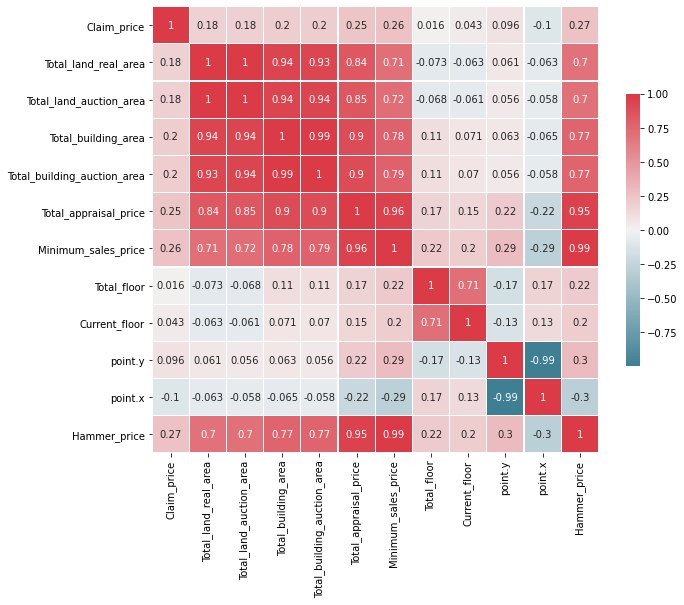

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train.corr()
plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, square=True, linewidths=.2, cbar_kws={'shrink': .5})


In [189]:
# 시계열인 거 ==> Appraisal_date(감정일자), First_auction_date(첫경매일), Final_auction_date(최종경매일), Preserve_regist_date(보존등기일), Close_date(종국일자)
# 음? 너무 많은디... 어뜨케 할까
# 1. 다 빼버린다 그냥
# 2. 다 년월 붙여서 라벨링을 해버린다?

In [265]:
# train['Appraisal_date'] = pd.to_datetime(train['Appraisal_date'])
# train['First_auction_date'] = pd.to_datetime(train['First_auction_date'])
# train['Preserve_regist_date'] = pd.to_datetime(train['Preserve_regist_date'])
# train['Close_date'] = pd.to_datetime(train['Close_date'])

#1. 그냥 다 뺀다.
train = train.drop(['Appraisal_date', 'First_auction_date', 'Final_auction_date', 'Preserve_regist_date', 'Close_date'], axis=1)
test = test.drop(['Appraisal_date', 'First_auction_date',  'Final_auction_date', 'Preserve_regist_date', 'Close_date'], axis=1)

In [266]:
# 층수 ==> 현재층수/전체층수 차원 하나 줄인다..

for i in range(len(train)):
  train['floor'] = train['Current_floor']/train['Total_floor']*100
  test['floor'] = train['Current_floor']/test['Total_floor']*100

train = train.drop(['Current_floor', 'Total_floor'], axis=1)
test = test.drop(['Current_floor', 'Total_floor'], axis=1)

In [267]:

train.info()
test.info()
print(train.shape)
print(test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_class                1933 non-null   object 
 1   Bid_class                    1933 non-null   object 
 2   Claim_price                  1933 non-null   int64  
 3   Appraisal_company            1933 non-null   object 
 4   Total_land_real_area         1933 non-null   float64
 5   Total_land_auction_area      1933 non-null   float64
 6   Total_building_area          1933 non-null   float64
 7   Total_building_auction_area  1933 non-null   float64
 8   Total_appraisal_price        1933 non-null   int64  
 9   Minimum_sales_price          1933 non-null   int64  
 10  addr_dong                    1933 non-null   object 
 11  addr_san                     1933 non-null   object 
 12  Apartment_usage              1933 non-null   object 
 13  Share_auction_YorN

In [271]:

print(len(train['Auction_class'].unique()))
print(len(train['Bid_class'].unique()))
print(len(train['Appraisal_company'].unique()))
print(len(train['Apartment_usage'].unique()))
print(len(train['juso'].unique()))



2
3
238
2
41


In [272]:
#라벨링
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = ['Auction_class', 'Bid_class', 'Appraisal_company', 'addr_dong', 'addr_san', 'Apartment_usage', 'Share_auction_YorN','juso']

for i in label:
  train[i] = le.fit_transform(train[i])

for i in label:
  test[i] = le.fit_transform(test[i])




In [273]:
display(train)

,Auction_class,Bid_class,Claim_price,Appraisal_company,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_dong,addr_san,Apartment_usage,Share_auction_YorN,point.y,point.x,Hammer_price,juso,floor
0,1,0,1766037301,181,37.35,37.35,181.77,181.77,836000000,668800000,205,0,1,0,35.162717,129.137048,760000000,15,11.111111
1,1,2,152946867,237,18.76,18.76,118.38,118.38,1073000000,858400000,205,0,0,0,35.156633,129.145068,971889999,15,72.857143
2,1,0,11326510,233,71.00,71.00,49.94,49.94,119000000,76160000,88,0,0,0,35.184601,128.996765,93399999,8,93.333333
3,1,2,183581724,128,32.98,32.98,84.91,84.91,288400000,230720000,58,0,0,0,35.154180,129.089081,256899000,3,55.000000
4,0,2,45887671,46,45.18,45.18,84.96,84.96,170000000,136000000,21,0,0,0,35.099630,128.998874,158660000,9,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0,2,280000000,99,40.55,40.55,84.87,84.87,401000000,401000000,246,0,0,0,37.648810,127.048683,402500000,25,71.428571
1929,1,2,200000000,95,39.60,39.60,114.81,114.81,454000000,363200000,130,0,0,0,37.663291,127.077063,430234600,24,100.000000
1930,1,2,354805459,107,19.03,19.03,133.98,133.98,1285000000,1028000000,280,0,1,0,37.558319,126.981994,1118999990,39,59.375000
1931,0,2,80000000,222,42.20,42.20,84.94,84.94,407000000,325600000,169,0,0,0,37.647061,127.028002,403000000,25,73.333333


In [277]:
x_train = train.drop(['Hammer_price'], axis=1)
y_train = train['Hammer_price']
x_test = test.drop(['Hammer_price'], axis=1)

display(x_train)
display(y_train)
display(x_test)

,Auction_class,Bid_class,Claim_price,Appraisal_company,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_dong,addr_san,Apartment_usage,Share_auction_YorN,point.y,point.x,juso,floor
0,1,0,1766037301,181,37.35,37.35,181.77,181.77,836000000,668800000,205,0,1,0,35.162717,129.137048,15,11.111111
1,1,2,152946867,237,18.76,18.76,118.38,118.38,1073000000,858400000,205,0,0,0,35.156633,129.145068,15,72.857143
2,1,0,11326510,233,71.00,71.00,49.94,49.94,119000000,76160000,88,0,0,0,35.184601,128.996765,8,93.333333
3,1,2,183581724,128,32.98,32.98,84.91,84.91,288400000,230720000,58,0,0,0,35.154180,129.089081,3,55.000000
4,0,2,45887671,46,45.18,45.18,84.96,84.96,170000000,136000000,21,0,0,0,35.099630,128.998874,9,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0,2,280000000,99,40.55,40.55,84.87,84.87,401000000,401000000,246,0,0,0,37.648810,127.048683,25,71.428571
1929,1,2,200000000,95,39.60,39.60,114.81,114.81,454000000,363200000,130,0,0,0,37.663291,127.077063,24,100.000000
1930,1,2,354805459,107,19.03,19.03,133.98,133.98,1285000000,1028000000,280,0,1,0,37.558319,126.981994,39,59.375000
1931,0,2,80000000,222,42.20,42.20,84.94,84.94,407000000,325600000,169,0,0,0,37.647061,127.028002,25,73.333333


0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

,Auction_class,Bid_class,Claim_price,Appraisal_company,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_dong,addr_san,Apartment_usage,Share_auction_YorN,point.y,point.x,juso,floor
0,0,0,1087000000,48,18.22,18.22,107.28,107.28,244565981,100174000,32,0,1,0,35.201112,129.088687,5,33.333333
1,0,0,1087000000,48,16.65,16.65,98.08,98.08,228745632,117118000,32,0,1,0,35.201112,129.088687,5,340.000000
2,0,0,1087000000,48,18.22,18.22,107.28,107.28,249565981,102222000,32,0,1,0,35.201112,129.088687,5,93.333333
3,0,0,1087000000,48,18.22,18.22,107.28,107.28,249565981,102222000,32,0,1,0,35.201112,129.088687,5,73.333333
4,0,0,1087000000,48,18.22,18.22,107.28,107.28,249565981,102222000,32,0,1,0,35.201112,129.088687,5,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,0,4249164200,14,13.87,13.87,84.91,84.91,420000000,336000000,216,0,1,0,37.605407,127.027309,32,52.173913
825,0,2,320000000,82,72.81,72.81,150.66,150.66,580000000,464000000,86,0,0,0,37.663305,127.039551,25,85.714286
826,0,2,160000000,96,34.03,34.03,49.77,49.77,293000000,234400000,127,0,0,0,37.614529,127.091109,39,8.333333
827,1,2,230000000,89,42.54,42.54,84.84,84.84,492000000,492000000,186,0,0,0,37.620359,127.047071,32,23.529412


In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train

array([[ 0.58591292, -3.75528331,  1.04345617, ...,  1.41557499,
        -0.47769322, -1.40156126],
       [ 0.58591292,  0.27299784, -0.16257208, ...,  1.42365337,
        -0.47769322,  0.72021717],
       [ 0.58591292, -3.75528331, -0.26845465, ...,  1.27427402,
        -1.12058828,  1.42384036],
       ...,
       [ 0.58591292,  0.27299784, -0.01165236, ..., -0.7551111 ,
         1.72651842,  0.2569304 ],
       [-1.70673825,  0.27299784, -0.21711086, ..., -0.70876907,
         0.4407283 ,  0.7365805 ],
       [ 0.58591292,  0.27299784, -0.14234579, ..., -0.88910887,
        -0.11032461, -0.69000434]])

In [224]:
train.corr()['Hammer_price'].sort_values()

Auction_key                   -0.418769
point.x                       -0.296312
Share_auction_YorN            -0.091157
addr_san                      -0.068954
addr_dong                     -0.017542
Apartment_usage               -0.004344
Appraisal_company             -0.004317
Bid_class                     -0.000203
floor                          0.008581
Auction_class                  0.054813
juso                           0.215830
Claim_price                    0.267728
point.y                        0.295698
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

In [279]:
#모델 학습

import torch
import torch.optim as optim
import numpy as np
import random
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(777)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device=='cuda':
  torch.manual_seed_all(777)

x_train = np.array(x_train)
y_train  = np.array(y_train)
x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)

dataset = torch.utils.data.TensorDataset(x_train, y_train)
data_loader = torch.utils.data.DataLoader(dataset, 
                                          batch_size = 100, 
                                          shuffle=True, 
                                          drop_last=True)



In [280]:
x_train.shape


torch.Size([1933, 18])

In [282]:
linear1 = torch.nn.Linear(18, 64)
linear2 = torch.nn.Linear(64, 64)
linear3 = torch.nn.Linear(64, 32)
linear4 = torch.nn.Linear(32, 1)

relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=0.2)

torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)


Parameter containing:
tensor([[ 0.2088, -0.3784,  0.0748,  0.1356,  0.0431,  0.1551,  0.3744, -0.1296,
         -0.0547,  0.0618,  0.3162, -0.1683,  0.0050, -0.3188,  0.2746, -0.1079,
          0.2049,  0.4220,  0.2188, -0.1425, -0.3655, -0.1063, -0.2912,  0.1209,
         -0.0132,  0.3626,  0.1279,  0.3459, -0.3387,  0.1068, -0.2790, -0.3474]],
       requires_grad=True)

In [283]:
model = torch.nn.Sequential(linear1, relu, dropout, 
                            linear2, relu, dropout, 
                            linear3, relu, dropout,
                            linear4).to(device)


In [286]:
loss = torch.nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [288]:
total_batch = len(data_loader)

#인공지능 수업에서 배운 코드 그대로..
for epoch in range(1500):
  avg_cost = 0
  model.train()
  for X, Y in data_loader:

      X = X.to(device)
      Y = Y.to(device)
      optimizer.zero_grad()
      hypothesis = model(X)
      cost = loss(hypothesis, Y)
      cost.backward()
      optimizer.step()
      avg_cost += cost / total_batch
  if epoch%149 == 0 :
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

  
    
 

  

Epoch: 0001 cost = 535799712796639232.000000000
Epoch: 0150 cost = 532435069776691200.000000000
Epoch: 0299 cost = 538011792752771072.000000000
Epoch: 0448 cost = 539776199677706240.000000000
Epoch: 0597 cost = 539623195762753536.000000000
Epoch: 0746 cost = 539309353912500224.000000000
Epoch: 0895 cost = 538436685277429760.000000000
Epoch: 1044 cost = 528107323290288128.000000000
Epoch: 1193 cost = 538700499348619264.000000000
Epoch: 1342 cost = 537564325880004608.000000000
Epoch: 1491 cost = 536566381638844416.000000000


In [289]:
with torch.no_grad():
  x_test = torch.from_numpy(x_test).float().to(device)
  prediction = model(x_test)

prediction

tensor([[ 911.0129],
        [1416.0692],
        [1396.1532],
        [1068.8778],
        [1040.3756],
        [1124.2999],
        [1052.7072],
        [ 522.5651],
        [ 870.6761],
        [ 544.4855],
        [ 481.8961],
        [ 763.8913],
        [1155.9340],
        [ 215.9741],
        [ 559.6561],
        [ 461.7808],
        [ 564.1483],
        [1120.7065],
        [ 903.9827],
        [ 500.0529],
        [ 518.0716],
        [ 746.4207],
        [ 926.9046],
        [ 763.2493],
        [1107.7795],
        [ 722.2194],
        [ 666.2868],
        [ 477.0998],
        [ 251.4826],
        [ 360.7906],
        [ 575.0226],
        [ 434.5294],
        [ 423.5192],
        [ 589.9413],
        [ 597.9748],
        [ 784.8194],
        [ 656.4119],
        [ 632.6809],
        [ 754.3116],
        [ 411.5066],
        [ 796.8561],
        [ 664.3120],
        [ 513.5725],
        [ 549.1060],
        [ 648.9357],
        [ 307.3962],
        [ 625.6143],
        [ 600

In [296]:

submission = pd.read_csv('Auction_submission.csv')
for i in range(len(prediction)):
  submission['Hammer_price'][i] = prediction[i]

submission.to_csv('submission.csv', index=False, header=True)
#613229595.62176